In [1]:
import os

import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine
import altair as alt

In [2]:
alt.renderers.enable("mimetype");

In [3]:
load_dotenv()

connection_string = "postgresql://{user}:{password}@{host}:{port}/{db}".format(
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT'),
    db=os.getenv('DB_NAME')
)
engine = create_engine(connection_string)

### Launches

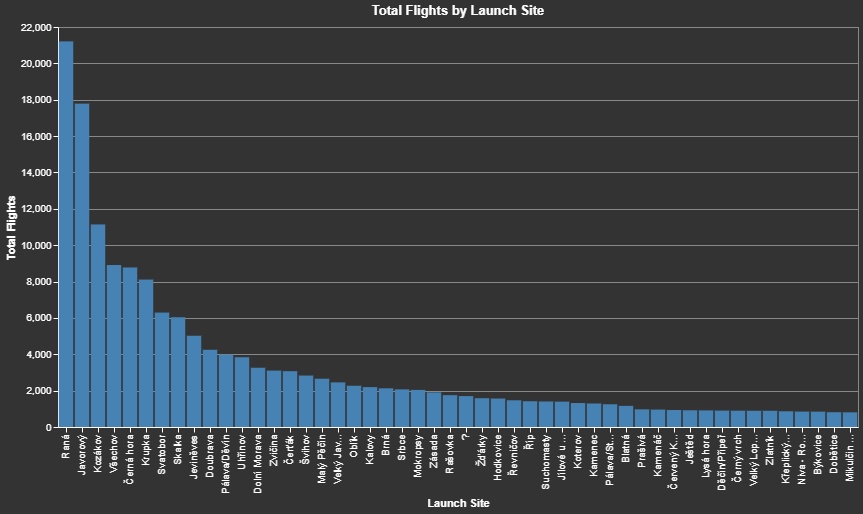

In [4]:
query = """
SELECT
    launch,
    COUNT(*) AS total_flights
FROM source.flights
GROUP BY launch
ORDER BY count(*) DESC
LIMIT 50
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('launch:N', sort=alt.EncodingSortField(field='total_flights', order='descending'), title='Launch Site'),
    y=alt.Y('total_flights:Q', title='Total Flights'),
    tooltip=['launch:N', 'total_flights:Q']
).properties(
    width=800,
    height=400,
    title='Total Flights by Launch Site'
)
barchart.show()

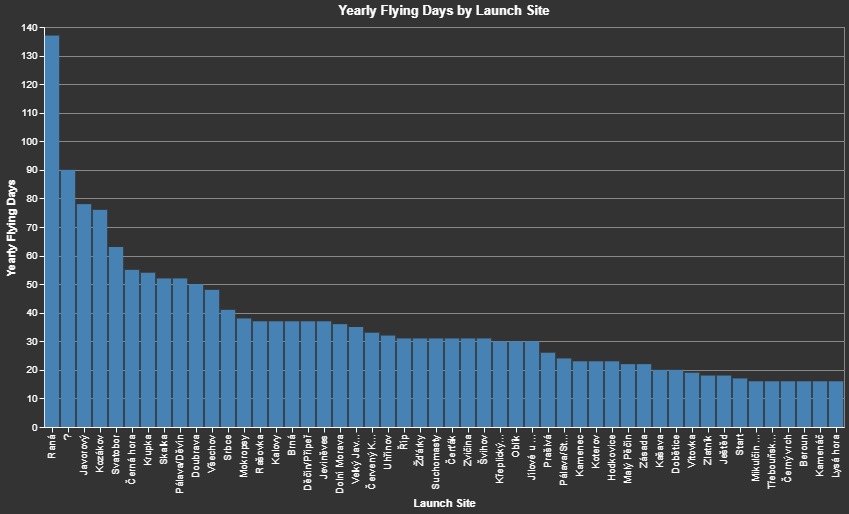

In [5]:
query = """
WITH flying_days AS (
    SELECT
        launch,
        COUNT(DISTINCT date) / COUNT(DISTINCT DATE_PART('year', date)) AS yearly_flying_days
    FROM source.flights
    GROUP BY launch
)
SELECT
    *
FROM flying_days
ORDER BY yearly_flying_days DESC
LIMIT 50
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('launch:N', sort=alt.EncodingSortField(field='total_flights', order='descending'), title='Launch Site'),
    y=alt.Y('yearly_flying_days:Q', title='Yearly Flying Days'),
    tooltip=['launch:N', 'yearly_flying_days:Q']
).properties(
    width=800,
    height=400,
    title='Yearly Flying Days by Launch Site'
)
barchart.show()

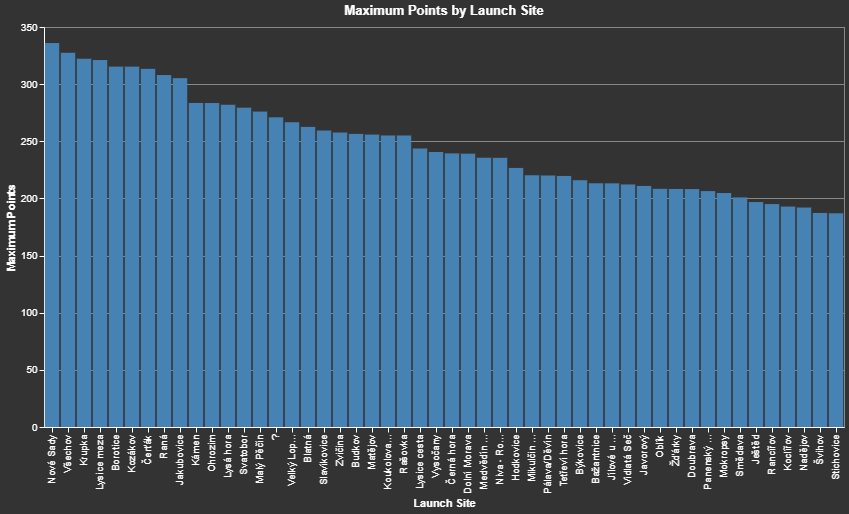

In [6]:
query = """
WITH max_points AS (
    SELECT
        launch,
        MAX(points) AS max_points
    FROM source.flights
    GROUP BY launch
)
SELECT
    *
FROM max_points
ORDER BY max_points DESC
LIMIT 50
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('launch:N', sort=alt.EncodingSortField(field='total_flights', order='descending'), title='Launch Site'),
    y=alt.Y('max_points:Q', title='Maximum Points'),
    tooltip=['launch:N', 'max_points:Q']
).properties(
    width=800,
    height=400,
    title='Maximum Points by Launch Site'
)
barchart.show()

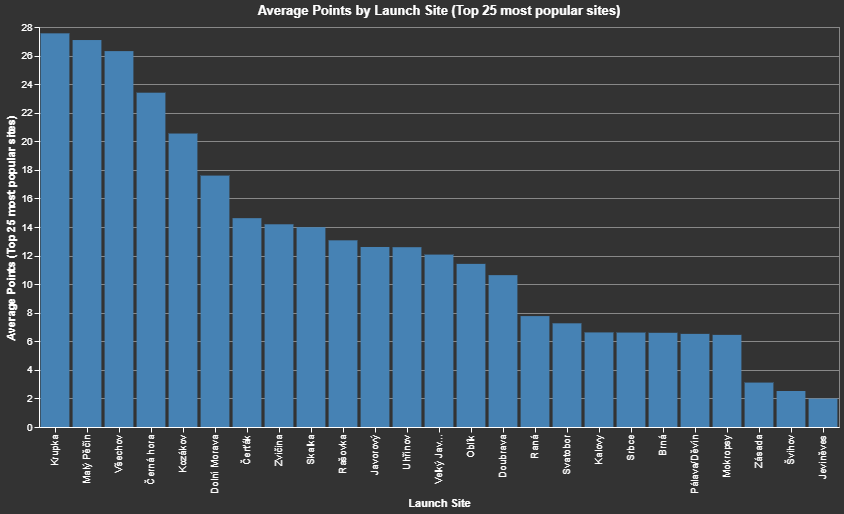

In [7]:
query = """
SELECT
    launch,
    COUNT(*) AS total_flights,
    AVG(points) AS avg_points
FROM source.flights
GROUP BY launch
ORDER BY count(*) DESC
LIMIT 25
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('launch:N', sort=alt.EncodingSortField(field='avg_points', order='descending'), title='Launch Site'),
    y=alt.Y('avg_points:Q', title='Average Points (Top 25 most popular sites)'),
    tooltip=['launch:N', 'avg_points:Q']
).properties(
    width=800,
    height=400,
    title='Average Points by Launch Site (Top 25 most popular sites)'
)
barchart.show()

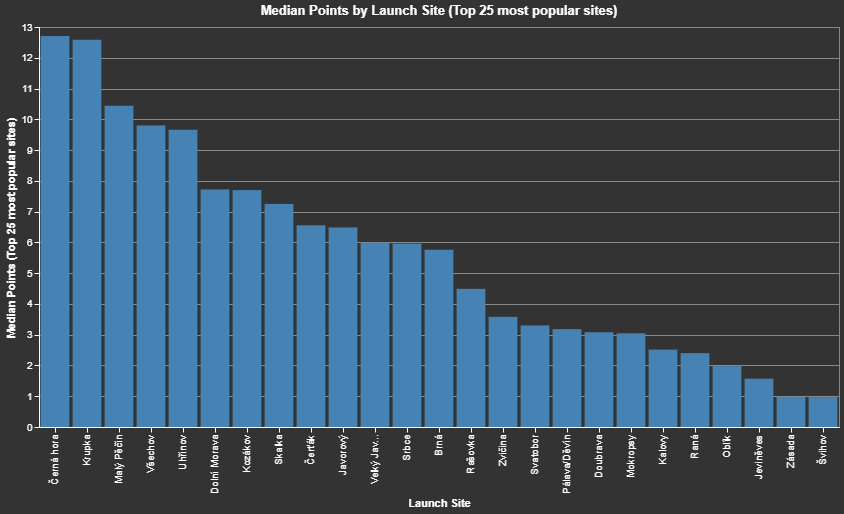

In [8]:
query = """
SELECT
    launch,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY points) AS median_points
FROM source.flights
GROUP BY launch
ORDER BY count(*) DESC
LIMIT 25
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('launch:N', sort=alt.EncodingSortField(field='median_points', order='descending'), title='Launch Site'),
    y=alt.Y('median_points:Q', title='Median Points (Top 25 most popular sites)'),
    tooltip=['launch:N', 'median_points:Q']
).properties(
    width=800,
    height=400,
    title='Median Points by Launch Site (Top 25 most popular sites)'
)
barchart.show()